In [1]:
import sys
import os

# Get the current working directory (where the notebook is running)
SCRIPT_DIR = os.getcwd()  # or use os.path.dirname(os.path.abspath('')) for similar effect
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

from som import SOM

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


Iter: 100: inertia: 9.58 | Learning Rate: 0.100 | Neighbourhood factor: 4.995
Iter: 200: inertia: 9.16 | Learning Rate: 0.100 | Neighbourhood factor: 4.990
Iter: 300: inertia: 8.24 | Learning Rate: 0.100 | Neighbourhood factor: 4.985
Iter: 400: inertia: 8.21 | Learning Rate: 0.100 | Neighbourhood factor: 4.980
Iter: 500: inertia: 8.10 | Learning Rate: 0.100 | Neighbourhood factor: 4.975
Iter: 600: inertia: 7.41 | Learning Rate: 0.099 | Neighbourhood factor: 4.970
Iter: 700: inertia: 7.33 | Learning Rate: 0.099 | Neighbourhood factor: 4.965
Iter: 800: inertia: 8.27 | Learning Rate: 0.099 | Neighbourhood factor: 4.960
Iter: 900: inertia: 7.99 | Learning Rate: 0.099 | Neighbourhood factor: 4.955
Iter: 1000: inertia: 7.23 | Learning Rate: 0.099 | Neighbourhood factor: 4.950
Iter: 1100: inertia: 8.24 | Learning Rate: 0.099 | Neighbourhood factor: 4.945
Iter: 1200: inertia: 8.91 | Learning Rate: 0.099 | Neighbourhood factor: 4.940
Iter: 1300: inertia: 9.87 | Learning Rate: 0.099 | Neighbourh

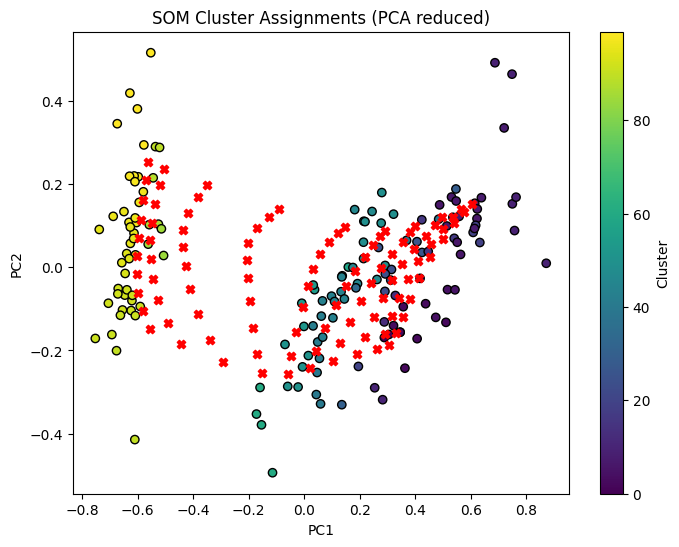

In [7]:
from sklearn.preprocessing import MinMaxScaler

X = iris.data
y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Fit SOM
pred = SOM(max_iters=100000, initial_learning_rate=0.1, verbose=True)
pred.fit(X, )

# Predict cluster assignments
grid_coords = pred.predict(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

grid_coords_2d = pca.transform(pred.weights_.reshape(-1, 4))

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pred.labels_, cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Cluster Assignments (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()

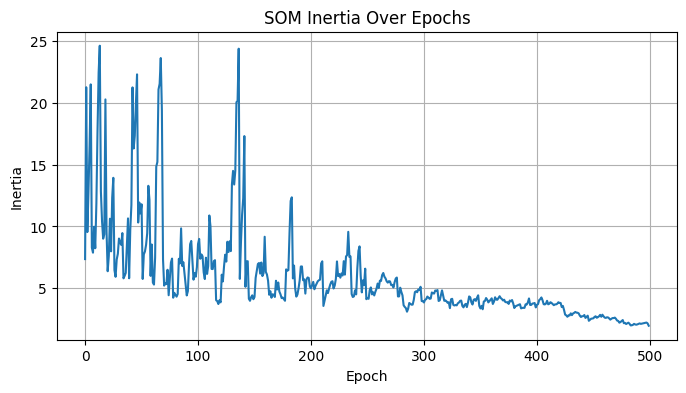

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(pred.inertia_history_)
plt.title("SOM Inertia Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


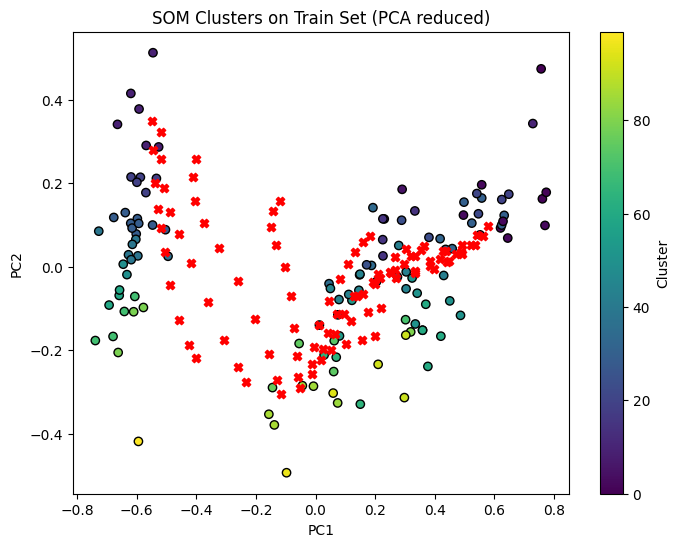

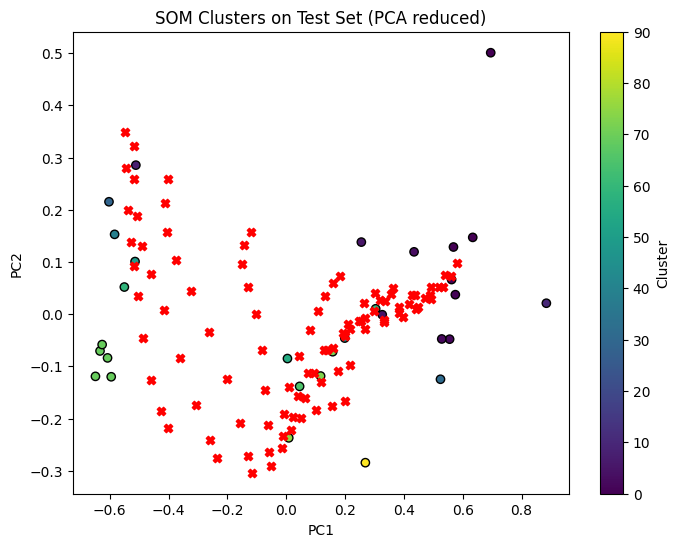

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on train set
pred = SOM(max_iters=100000)
pred.fit(X_train)

# Predict on test set
test_grid_coords = pred.predict(X_test)

# Visualize test predictions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
grid_coords_2d = pca.transform(pred.weights_.reshape(-1, 4))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=pred.labels_, cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Clusters on Train Set (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()


X_test_2d = pca.transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=[pred.coord_label_map_.get(tuple(c)) for c in test_grid_coords], cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Clusters on Test Set (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()
